# How sigmoids combine

##### Keywords: MLP, neural network, pytorch, SGD

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as fn
from torch.autograd import Variable
class MLRegP(nn.Module):
    def __init__(self, input_dim, hidden_dim, nonlinearity = fn.tanh, additional_hidden_wide=0):
        super(MLRegP, self).__init__()
        self.fc_initial = nn.Linear(input_dim, hidden_dim)
        self.fc_mid = nn.ModuleList()
        self.additional_hidden_wide = additional_hidden_wide
        for i in range(self.additional_hidden_wide):
            self.fc_mid.append(nn.Linear(hidden_dim, hidden_dim))
        self.fc_final = nn.Linear(hidden_dim, 1)
        self.nonlinearity = nonlinearity

    def forward(self, x):
        x = self.fc_initial(x)
        out_init = self.nonlinearity(x)
        x = self.nonlinearity(x)
        for i in range(self.additional_hidden_wide):
            x = self.fc_mid[i](x)
            x = self.nonlinearity(x)
        out_final = self.fc_final(x)
        return out_final, x, out_init

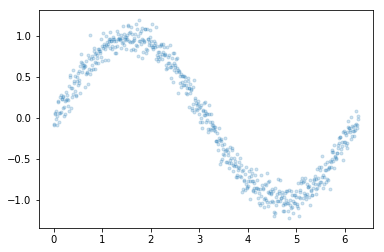

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x) + 0.1*np.random.normal(size=x.shape[0])
xgrid=x
ygrid=y
plt.plot(x,y, '.', alpha=0.2);

In [14]:
xgrid.shape

(629,)

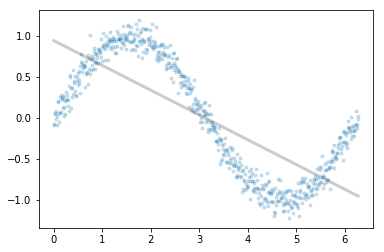

In [3]:
from sklearn.linear_model import LinearRegression
est = LinearRegression().fit(x.reshape(-1,1), y)
plt.plot(x,y, '.', alpha=0.2);
plt.plot(x,est.predict(x.reshape(-1,1)), 'k-', lw=3, alpha=0.2);

In [4]:
xdata = Variable(torch.Tensor(xgrid))
ydata = Variable(torch.Tensor(ygrid))

In [67]:
import torch.utils.data
dataset = torch.utils.data.TensorDataset(torch.from_numpy(xgrid.reshape(-1,1)), torch.from_numpy(ygrid))
loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [68]:
dataset.data_tensor.shape, dataset.target_tensor.shape

(torch.Size([629, 1]), torch.Size([629]))

In [64]:
def run_model(model, epochs):
    criterion = nn.MSELoss()
    lr, epochs, batch_size = 1e-1 , epochs , 64
    optimizer = torch.optim.SGD(model.parameters(), lr = lr )
    accum=[]
    for k in range(epochs):
        localaccum = []
        for localx, localy in iter(loader):
            localx = Variable(localx.float())
            localy = Variable(localy.float())
            output, _, _ = model.forward(localx)
            loss = criterion(output, localy)
            model.zero_grad()
            loss.backward()
            optimizer.step()
            localaccum.append(loss.data[0])
        accum.append((np.mean(localaccum), np.std(localaccum)))
    return accum

### input dim 1, 2 hidden layers width 2, linear output

In [92]:
model = MLRegP(1, 2, nonlinearity=fn.sigmoid, additional_hidden_wide=1)

In [93]:
print(model)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=2)
  (fc_mid): ModuleList(
    (0): Linear(in_features=2, out_features=2)
  )
  (fc_final): Linear(in_features=2, out_features=1)
)


In [94]:
accum = run_model(model, 2000)

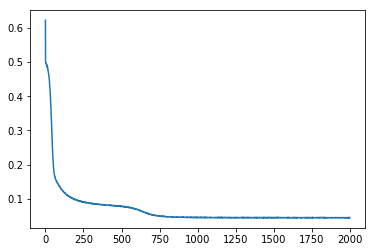

In [95]:
plt.plot([a[0] for a in accum]);

(0, 1000)

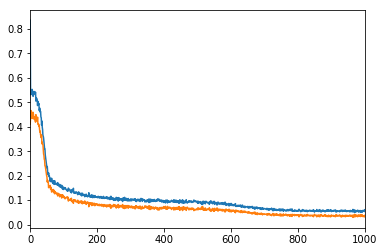

In [96]:
plt.plot([a[0]+a[1] for a in accum]);
plt.plot([a[0]-a[1] for a in accum]);
plt.xlim(0, 1000)

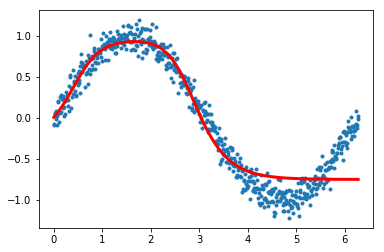

In [97]:
finaloutput, init_output, mid_output = model.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")
#plt.xticks([])
#plt.yticks([])

In [98]:
io = mid_output.data.numpy()
io.shape

(629, 2)

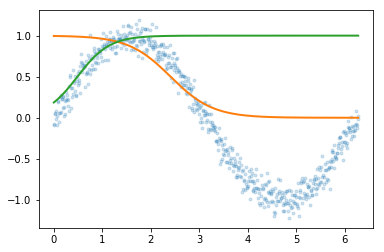

In [99]:
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 2 hidden layers width 4, linear output

In [105]:
model2 = MLRegP(1, 4, nonlinearity=fn.sigmoid, additional_hidden_wide=1)
accum = run_model(model2, 4000)

In [129]:
print(model2)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=4)
  (fc_mid): ModuleList(
    (0): Linear(in_features=4, out_features=4)
  )
  (fc_final): Linear(in_features=4, out_features=1)
)


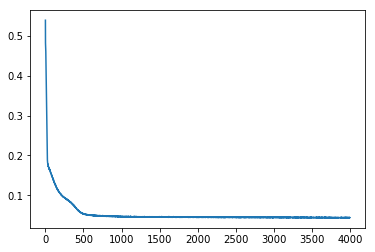

In [106]:
plt.plot([a[0] for a in accum]);

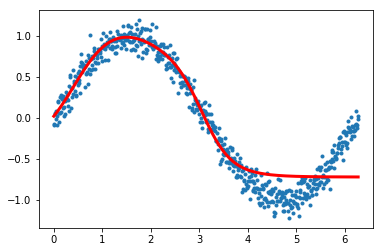

In [107]:
finaloutput, init_output, mid_output = model2.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

In [108]:
io = mid_output.data.numpy()
io.shape

(629, 4)

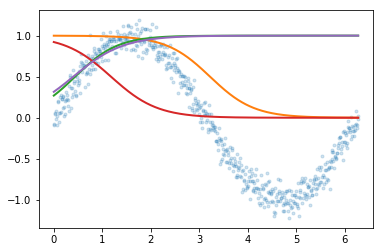

In [109]:
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 2 hidden layers width 8, linear output

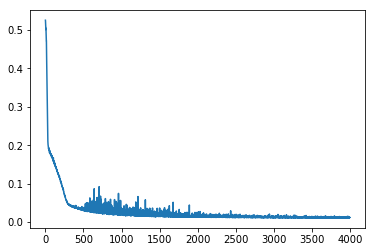

In [110]:
model3 = MLRegP(1, 8, nonlinearity=fn.sigmoid, additional_hidden_wide=1)
accum = run_model(model3, 4000)
plt.plot([a[0] for a in accum]);

In [128]:
print(model3)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=8)
  (fc_mid): ModuleList(
    (0): Linear(in_features=8, out_features=8)
  )
  (fc_final): Linear(in_features=8, out_features=1)
)


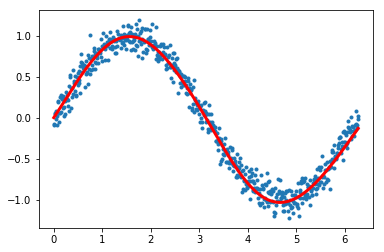

In [111]:
finaloutput, init_output, mid_output = model3.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

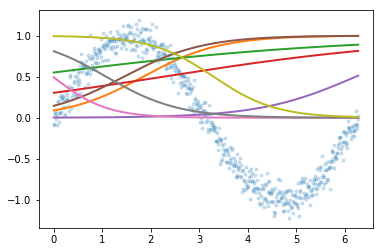

In [112]:
io = mid_output.data.numpy()
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 3 hidden layers width 4, linear output

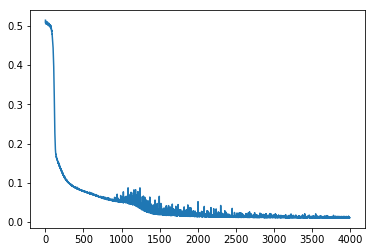

In [114]:
model4 = MLRegP(1, 4, nonlinearity=fn.sigmoid, additional_hidden_wide=2)
accum = run_model(model4, 4000)
plt.plot([a[0] for a in accum]);

In [127]:
print(model4)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=4)
  (fc_mid): ModuleList(
    (0): Linear(in_features=4, out_features=4)
    (1): Linear(in_features=4, out_features=4)
  )
  (fc_final): Linear(in_features=4, out_features=1)
)


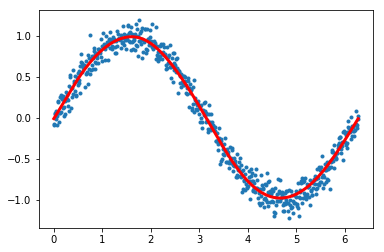

In [115]:
finaloutput, init_output, mid_output = model4.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

### input dim 1, 3 hidden layers width 2, linear output

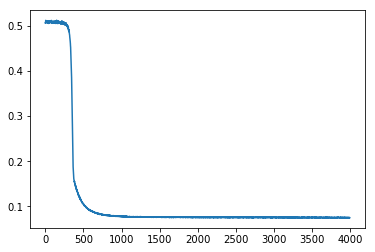

In [117]:
model5 = MLRegP(1, 2, nonlinearity=fn.sigmoid, additional_hidden_wide=2)
accum = run_model(model5, 4000)
plt.plot([a[0] for a in accum]);

In [130]:
print(model5)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=2)
  (fc_mid): ModuleList(
    (0): Linear(in_features=2, out_features=2)
    (1): Linear(in_features=2, out_features=2)
  )
  (fc_final): Linear(in_features=2, out_features=1)
)


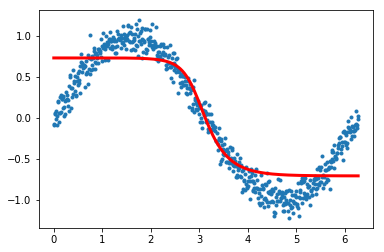

In [118]:
finaloutput, init_output, mid_output = model5.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

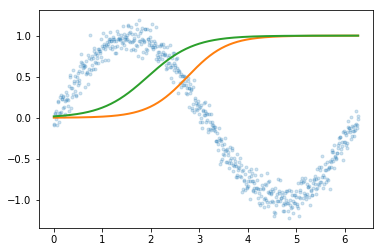

In [119]:
io = mid_output.data.numpy()
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 1 hidden layers width 2, linear output

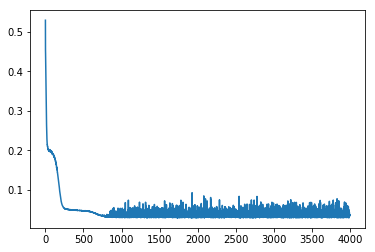

In [120]:
model6 = MLRegP(1, 2, nonlinearity=fn.sigmoid, additional_hidden_wide=0)
accum = run_model(model6, 4000)
plt.plot([a[0] for a in accum]);

In [131]:
print(model6)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=2)
  (fc_mid): ModuleList(
  )
  (fc_final): Linear(in_features=2, out_features=1)
)


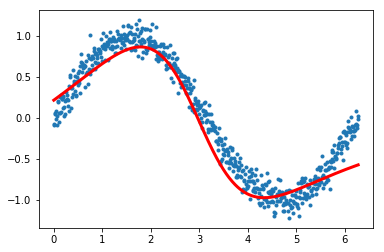

In [121]:
finaloutput, init_output, mid_output = model6.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

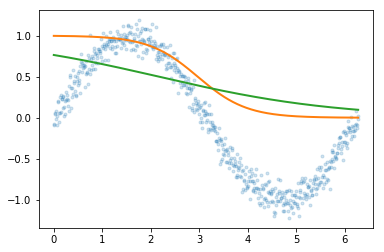

In [122]:
io = mid_output.data.numpy()
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 1 hidden layers width 1, linear output

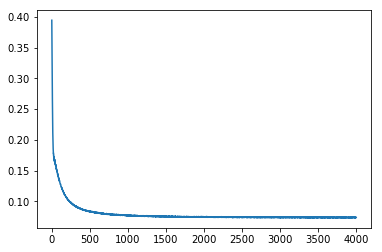

In [124]:
model7 = MLRegP(1, 1, nonlinearity=fn.sigmoid, additional_hidden_wide=0)
accum = run_model(model7, 4000)
plt.plot([a[0] for a in accum]);

In [132]:
print(model7)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=1)
  (fc_mid): ModuleList(
  )
  (fc_final): Linear(in_features=1, out_features=1)
)


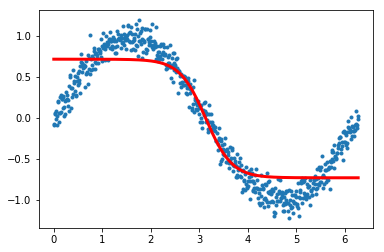

In [125]:
finaloutput, init_output, mid_output = model7.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")

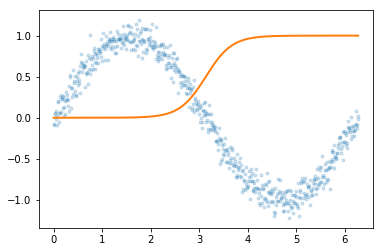

In [126]:
io = mid_output.data.numpy()
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)

### input dim 1, 1 hidden layers width 16, linear output

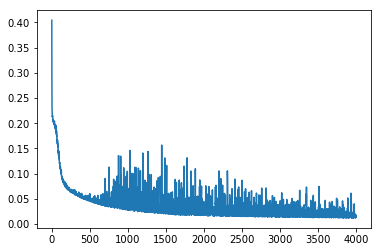

In [138]:
model8 = MLRegP(1, 16, nonlinearity=fn.sigmoid, additional_hidden_wide=0)
accum = run_model(model8, 4000)
plt.plot([a[0] for a in accum]);

In [139]:
print(model8)

MLRegP(
  (fc_initial): Linear(in_features=1, out_features=16)
  (fc_mid): ModuleList(
  )
  (fc_final): Linear(in_features=16, out_features=1)
)


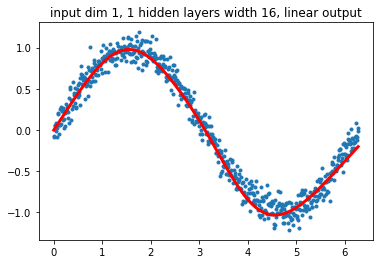

In [143]:
finaloutput, init_output, mid_output = model8.forward(xdata.view(-1,1))
plt.plot(xgrid, ygrid, '.')
plt.plot(xgrid, finaloutput.data.numpy(), lw=3, color="r")
plt.title("input dim 1, 1 hidden layers width 16, linear output");

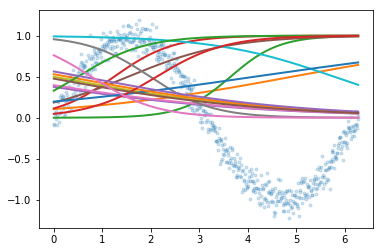

In [141]:
io = mid_output.data.numpy()
plt.plot(xgrid, ygrid, '.', alpha=0.2)
for j in range(io.shape[1]):
    plt.plot(xgrid, io[:, j], lw=2)